In [56]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

In [57]:
data = load_google_sheet()

In [58]:
data

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything
...,...,...,...,...
495,2023-12-03 15:49:21,Extremely likely,very good and quick service,
496,2023-12-04 12:41:52,Extremely likely,the nurse alex was amazing as usualthank you,reception team needs to be more professional ...
497,2023-12-05 18:19:52,Extremely likely,i am happy with staff since almost years,
498,2023-12-07 12:58:40,Unlikely,because when i booked appointments by phone m...,


In [68]:
data.shape[0]

500

In [59]:
for item in data['free_text']:
    print(item)

very friendly caring staff treated me with respect and listened to my problem
so good so confidential
the doctor was very understanding and very knowledgeable
dr e was extremely nice
i was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone i wasn’t able to answer but i was called back twice to complete my assessment of my health worry

very professional and very kind i feel comfortable when i attend my appointment there
faster appointment  treatment 
love the practice
the nurse miss aleksandra florko was absolutely amazing understanding kind fun thorough careful she is the best
i have been with surgery for considerable  years and was well looked after by dr param  hoping the work ethic continues apart that good service good location etc
efficient friendly  staff
good service
because the staff are very helpful
nurse alex is really helpful and look after us
friendly  professional and easily accessible
dr great
the 

In [60]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')
data

,time,rating,free_text,do_better,rating_score,classif,classif_scores,sentiment,sentiment_score
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up,5,admiration,0.588930,positive,0.866406
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,5,admiration,0.910946,positive,0.925523
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best,5,admiration,0.875547,positive,0.968350
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind,5,admiration,0.905494,positive,0.975969
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,5,neutral,0.234010,neutral,0.757862
...,...,...,...,...,...,...,...,...,...
495,2023-12-03 15:49:21,Extremely likely,very good and quick service,NaN,5,admiration,0.941572,positive,0.934329
496,2023-12-04 12:41:52,Extremely likely,the nurse alex was amazing as usualthank you,reception team needs to be more professional ...,5,gratitude,0.951041,positive,0.984073
497,2023-12-05 18:19:52,Extremely likely,i am happy with staff since almost years,NaN,5,joy,0.886973,positive,0.972022
498,2023-12-07 12:58:40,Unlikely,because when i booked appointments by phone m...,NaN,2,neutral,0.610167,negative,0.645661


<Axes: >

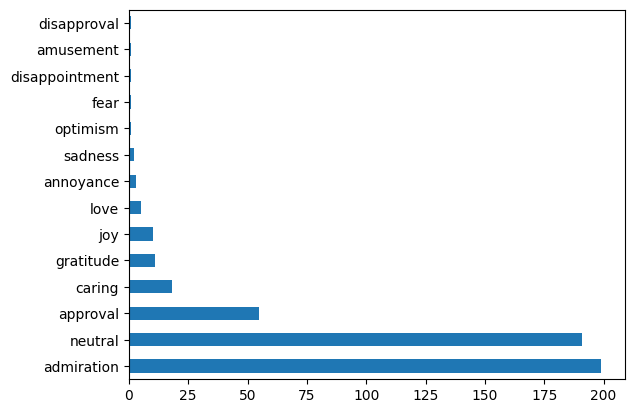

In [61]:
data2['classif'].value_counts().plot(kind='barh')

<Axes: >

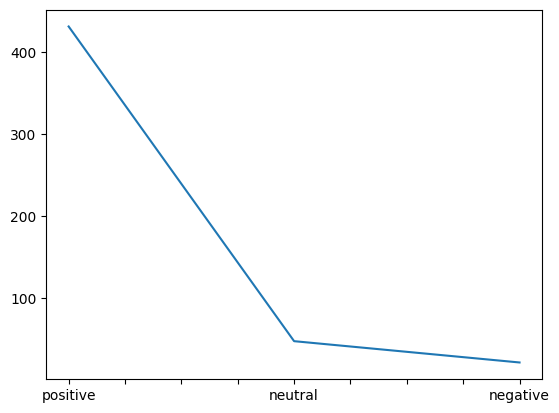

In [62]:
data2['sentiment'].value_counts().plot()

In [63]:
class_list = list(data2['classif'].unique())

In [64]:
class_list

['admiration',
 'neutral',
 'love',
 'optimism',
 'caring',
 'approval',
 'joy',
 'gratitude',
 'fear',
 'annoyance',
 'disappointment',
 'amusement',
 'disapproval',
 'sadness']

<Axes: xlabel='rating_score', ylabel='sentiment_score'>

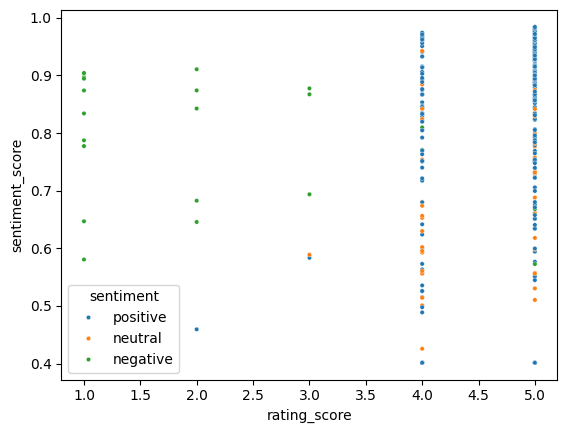

In [65]:
import seaborn as sns 
sns.scatterplot(data=data, x='rating_score', y='sentiment_score', hue='sentiment', s=10, color='#cd4d31')

In [66]:
exclude_list = ['fine', 'no', 'nan', 'not', 'ok', 'nothing', 'anything', 'okay']
for text in data['do_better']:
    words = str(text).lower().split()  # Split the text into words and convert to lowercase
    if not any(word in exclude_list for word in words):
        print(text)


keep it up
the receptionist was very unkind
the basement is a bit dark and gloomy and reception area could also do with an upgrade
earls court surgery is really lucky to have nurse alex
yes of course she showed me the easy and a great way to apply for my medicine
everything was done professionally
the staff and especially the gp are very good in service
wait time
yes they didnt have my xray for my arm  a waste off time for me there
sendn me to specialistthe best
more knowledge newly qualified doctors  enthusiastic
yes
more doctors in the surgery
everything is good
every body enjoying to work 
i can feel it
more face to face appointment with the doctors
can’t think of anythink
doctor and all the staff
to change all the front desk staff
possibly getting an appointment more quickly if required
longer time with the doctors if needed
i’m fully satisfied for their service and kind
bee more professional
easy access to blood tests results
cant think of any at this time
i dont think so
my above